<a href="https://colab.research.google.com/github/Hjhirp/Digital-Image-Processing-and-Analysis/blob/main/Lab4/DIPA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: To experiment and analyse how histogram equalization will help enhance the image provided during the lab session. Also, use equalisation on five different types of images and find out in which case it gives the weakest enhancement.

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
gray = io.imread('/content/drive/MyDrive/DIPA/b.jpg', as_gray=True) # 64-bit float

In [ ]:
gray.shape

(245, 370)

In [ ]:
shape_ = gray.shape[0]*gray.shape[1]

In [ ]:
shape_

90650

In [ ]:
dict_ = {}
for i in range(0,gray.shape[0]):
  for j in range(0,gray.shape[1]):
    dict_[gray[i][j]] = 0

In [ ]:
for i in range(0,gray.shape[0]):
  for j in range(0,gray.shape[1]):
    dict_[gray[i][j]] += 1

In [ ]:
dict_ = dict(sorted(dict_.items()))

In [ ]:
# dict_

In [ ]:
for i,j in dict_.items():
    dict_[i] = (j/shape_)

In [ ]:
for i in range(1,256):
  dict_[i] = dict_[i] + dict_[i-1]


In [ ]:
for i in range(0,256):
  dict_[i] = dict_[i] * 255

In [ ]:
# dict_

In [ ]:
new_img =[]
hist_img = []
for i in range(0,gray.shape[0]):
  temp=[]
  hist_ = []
  for j in range(0,gray.shape[1]):
      temp.append(dict_[gray[i][j]])
      hist_.append(np.floor(dict_[gray[i][j]]).astype(np.uint8))
  new_img.append(temp)
  hist_img.append(hist_)

In [ ]:
def hist(img):
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])
  plt.figure()
  plt.title('Grayscale histogram')
  plt.xlabel('Bins')
  plt.ylabel('# of pixels')
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.show()

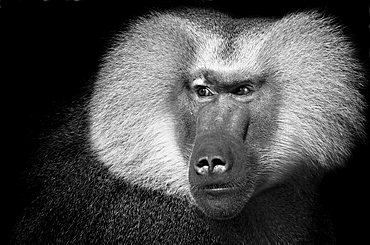

In [ ]:
cv2_imshow(gray)

In [ ]:
type(gray[0][0])

numpy.uint8

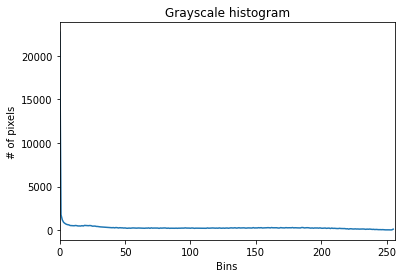

In [ ]:
hist(gray)

In [ ]:
new_img = np.array(new_img)
hist_img = np.array(hist_img)

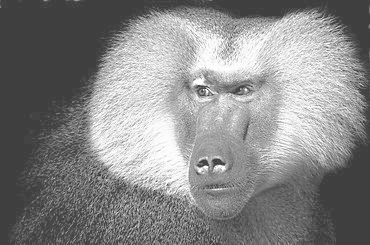

In [ ]:
cv2_imshow(new_img)

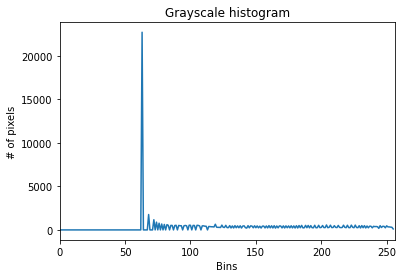

In [ ]:
hist(hist_img)